## Phát hiện gian lận trong giao dịch và thanh toán

Gian lận trong giao dịch và thanh toán là 1 vấn đề nhức nhối trong ngân hàng và các tổ chức cũng như các quỹ lưu thông tài chính. Từ mối quan ngại này, phát hiện gian lận hay fraud detection trở thành 1 đề tài nóng hổi với nhiều sự cái tiến để có thể phát hiện cũng như giảm thiểu các trường hợp gian lận.

![](https://www.lifeinsuranceinternational.com/wp-content/uploads/sites/8/2021/09/fraud-prevention-3188092_1920.jpg)

Để giúp các bạn bước đầu tiếp xúc với dữ liệu thực tế, trong bài tập cuối khoá này, chúng ta sẽ cùng nhau phân tích 6362620 bản ghi được trích xuất từ log lưu trữ các giao dịch trong 1 ngân hàng đã được lưu trong file `Fraud_logs.zip` với các trường thông tin như sau:

|**Columns**|**Meaning**|
|-|-|
| `step` | Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
| `type` | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.|
|`amount` | Amount of the transaction in local currency.|
|`nameOrig` | Customer who started the transaction.|
| `oldbalanceOrg` | Initial balance before the transaction.|
| `newbalanceOrig` | New balance after the transaction.|
| `nameDest` | Customer who is the recipient of the transaction.|
| `oldbalanceDest` | Initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).|
| `newbalanceDest` | New balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).|
| `isFraud` |This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.|
|`isFlaggedFraud` | The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.|

Các bạn có thể tải file `Fraud_logs.zip` tại [đây](https://onedrive.live.com/?authkey=%21AO%2DVswbtMi0M73M&id=C6CB1FED4E11A01B%2133218&cid=C6CB1FED4E11A01B).
## Mục tiêu bài tập cuối khoá
### 1. **Phân tích dữ liệu để tìm ra các mối tương quan, mối liên hệ giữa các đặc trưng và nhãn dự đoán**.
- **Gợi ý**: Đánh giá tốc độ giao dịch_khác biệt về thời gian giữa giao dịch hiện tại và giao dịch trước đó, đánh giá sự khác biệt về số tiền, giá trị giao dịch và số lượng giao dịch trong một thời gian ngắn, giá trị giao dịch so với số dư bắt đầu (hoặc ngược lại, số dư còn lại/số dư ban đầu)...

### 2. **Trực quan hoá các mối tương quan các bạn tìm ra**.
- **Gợi ý**: Tận dụng thư viện Matplotlib và Seaborn để trực quan hoá các mối tương quan cũng như đánh giá phân bố của các đặc trưng và giữa các nhãn, ...

### 3. **Chọn lọc và xây dựng bộ đặc trưng**.
- **Gợi ý**: Khi chọn bộ đặc trưng lưu ý chuẩn hoá dữ liệu về cũng 1 scale và xử lí các vấn đề dữ liệu như missing value, outliers, ...

### 4. **Xây dựng mô hình dự đoán với các yêu cầu sau**:
- Chia dữ liệu theo tỉ lệ 70% train và 30% test với random seed = 42.
    - **Gợi ý**: Với 70% tập train các bạn hoàn toàn có thể thử nghiệm với cross validation, chia train validation để tăng độ khái quát hoá của mô hình..
- Mô hình: Các bạn có thể thử nghiệm với nhiều loại mô hình khác nhau bao gồm mô hình tuyến tính như Linear Regression, phi tuyến tính như SVM, Decision Trees, Random Forest, và Deep Learning
- Mục tiêu đầu ra: **F1-score >= 0.8**

> - My supporter: https://github.com/honghanhh
> - Dự án dịch sách: https://github.com/mlbvn/ml-yearning-vn
> - Bibliography: [Python](https://zootopi.dev/tutorial/python/anaconda/), [basic Machine Learning_1](https://machinelearningcoban.com/2016/12/28/linearregression/), [basic Machine Learning_2](https://machinelearningcoban.com/)

- Data of this Project: [Link data on GG Drive](https://drive.google.com/drive/folders/12nqAwLv9GN_iu_B7jdwqohpk-PVAY1i5?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_dataset_ops import optimize_dataset
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../PYTHON L2/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data = df.drop(columns=['step', 'type', 'nameOrig', 'nameDest'])
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0
3,181.00,181.0,0.00,21182.0,0.0,1,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0


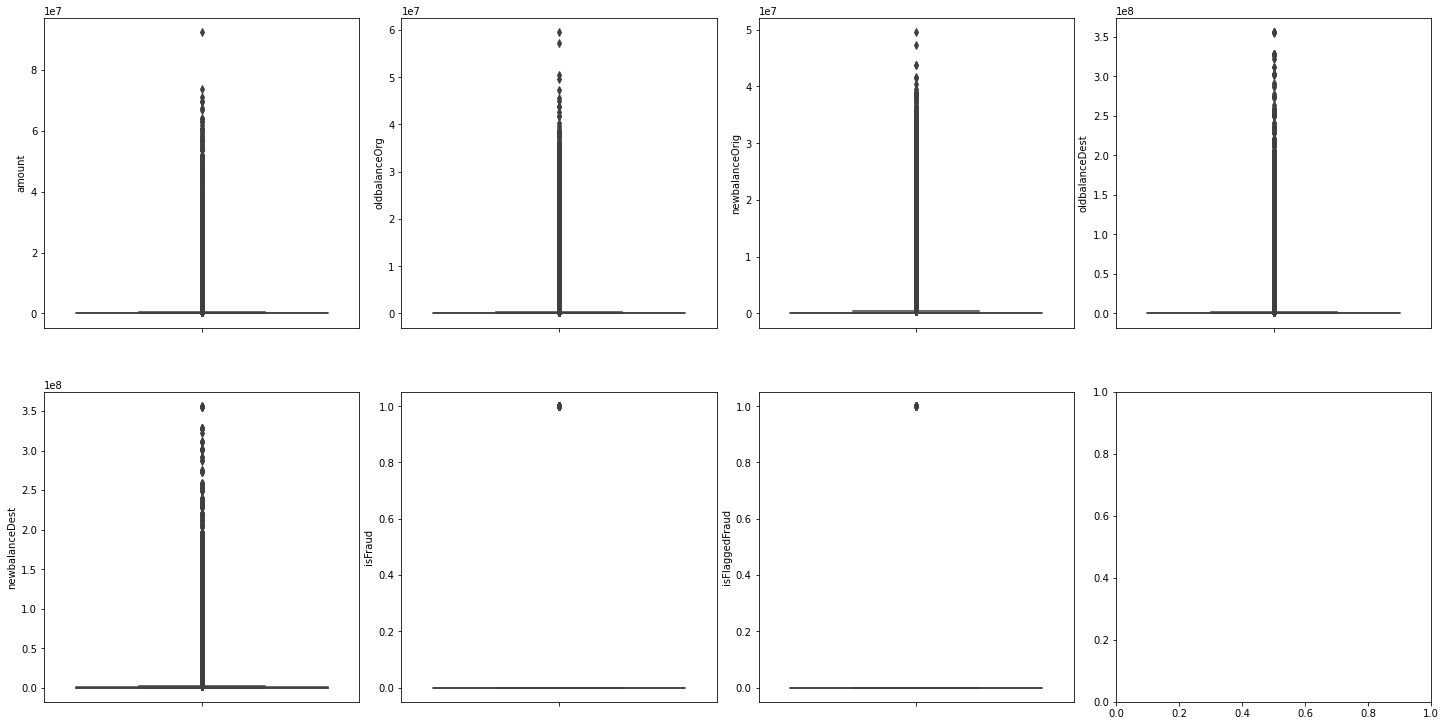

In [6]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index], orient="v")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
type_dummies = pd.get_dummies(df['type'])
type_dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [8]:
merged_df = pd.concat([data, type_dummies], axis=1)
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
merged_df['amount'] = scaler.fit_transform(data.filter(['amount']))
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000106,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,0.000020,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,0.000002,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,0.000002,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,0.000126,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.003674,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,0.068272,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,0.068272,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,0.009195,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [10]:
scaler_data = merged_df.filter(["oldbalanceOrg"])
dataset = scaler_data.values

merged_df['oldbalanceOrg'] = scaler.fit_transform(dataset)
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000106,0.002855,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,0.000020,0.000357,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,0.000002,0.000003,0.00,0.00,0.00,1,0,0,0,0,0,1
3,0.000002,0.000003,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,0.000126,0.000697,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,0.068272,0.105923,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,0.068272,0.105923,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,0.009195,0.014265,0.00,0.00,0.00,1,0,0,0,0,0,1


In [11]:
scaler_data = merged_df.filter(["newbalanceOrig"])
dataset = scaler_data.values

merged_df['newbalanceOrig'] = scaler.fit_transform(dataset)
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000106,0.002855,0.003233,0.00,0.00,0,0,0,0,0,1,0
1,0.000020,0.000357,0.000391,0.00,0.00,0,0,0,0,0,1,0
2,0.000002,0.000003,0.000000,0.00,0.00,1,0,0,0,0,0,1
3,0.000002,0.000003,0.000000,21182.00,0.00,1,0,0,1,0,0,0
4,0.000126,0.000697,0.000603,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.00,339682.13,1,0,0,1,0,0,0
6362616,0.068272,0.105923,0.000000,0.00,0.00,1,0,0,0,0,0,1
6362617,0.068272,0.105923,0.000000,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,0.009195,0.014265,0.000000,0.00,0.00,1,0,0,0,0,0,1


In [12]:
scaler_data = merged_df.filter(["oldbalanceDest"])
dataset = scaler_data.values

merged_df['oldbalanceDest'] = scaler.fit_transform(dataset)
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000106,0.002855,0.003233,0.000000,0.00,0,0,0,0,0,1,0
1,0.000020,0.000357,0.000391,0.000000,0.00,0,0,0,0,0,1,0
2,0.000002,0.000003,0.000000,0.000000,0.00,1,0,0,0,0,0,1
3,0.000002,0.000003,0.000000,0.000059,0.00,1,0,0,1,0,0,0
4,0.000126,0.000697,0.000603,0.000000,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,339682.13,1,0,0,1,0,0,0
6362616,0.068272,0.105923,0.000000,0.000000,0.00,1,0,0,0,0,0,1
6362617,0.068272,0.105923,0.000000,0.000192,6379898.11,1,0,0,1,0,0,0
6362618,0.009195,0.014265,0.000000,0.000000,0.00,1,0,0,0,0,0,1


In [13]:
scaler_data = merged_df.filter(["newbalanceDest"])
dataset = scaler_data.values

merged_df['newbalanceDest'] = scaler.fit_transform(dataset)
merged_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,0,0,0,1,0
1,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,0,0,0,1,0
2,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,0,0,0,0,1
3,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,0,1,0,0,0
4,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,0,1,0,0,0
6362616,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,0,0,0,0,1
6362617,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,0,1,0,0,0
6362618,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,0,0,0,0,1


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
 7   CASH_IN         uint8  
 8   CASH_OUT        uint8  
 9   DEBIT           uint8  
 10  PAYMENT         uint8  
 11  TRANSFER        uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 370.1 MB


In [15]:
X_train, x_test, Y_train, y_test = train_test_split(merged_df.drop(columns='isFraud'), merged_df['isFraud'], test_size=0.3, random_state=42)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [17]:
x_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5094833,0.001739,0.000000,0.000000,0.001007,0.001458,0,0,1,0,0,0
2530053,0.002555,0.000146,0.004939,0.000808,0.000145,0,1,0,0,0,0
191411,0.003108,0.000805,0.000000,0.000000,0.000807,0,0,1,0,0,0
3474210,0.002095,0.000323,0.004294,0.000000,0.000000,0,1,0,0,0,0
3697174,0.000168,0.001023,0.000916,0.000000,0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4433073,0.000061,0.000359,0.000317,0.000000,0.000000,0,0,0,0,1,0
4420063,0.001893,0.000003,0.003533,0.001641,0.001149,0,1,0,0,0,0
559576,0.000620,0.050093,0.061350,0.001262,0.001101,0,1,0,0,0,0
1317646,0.004389,0.000072,0.008271,0.000617,0.000000,0,1,0,0,0,0


In [18]:
# Create model:

model = Sequential([
                    InputLayer(x_train.shape[1]),
                    Dense(15, activation='relu'),
                    Dropout(0.3),
                    BatchNormalization(),
                    Dense(15, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(1, activation='sigmoid')
                ])

In [19]:
# Compile model:

model.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy']
            )

In [20]:
es = EarlyStopping(patience=3, restore_best_weights=True)
history_1 = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                      epochs=10, batch_size=100,
                      callbacks=es,
                      verbose=1)

Epoch 1/10
35631/35631 [==============================] - 183s 5ms/step - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 2/10
35631/35631 [==============================] - 189s 5ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0993 - val_accuracy: 0.9855
Epoch 3/10
35631/35631 [==============================] - 135s 4ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0173 - val_accuracy: 0.9987
Epoch 4/10
35631/35631 [==============================] - 96s 3ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0084 - val_accuracy: 0.9992


In [21]:
model.evaluate(x_test, y_test)

59650/59650 [==============================] - 63s 1ms/step - loss: 0.0058 - accuracy: 0.9991


[0.0058484189212322235, 0.999127209186554]

In [22]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_pred.shape

(1908786,)

In [25]:
y = np.bincount(y_pred)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[      0, 1908786]], dtype=int64)

In [26]:
y_truth = y_test.to_numpy()
y_truth

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
y = np.bincount(y_truth)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[      0, 1906351],
       [      1,    2435]], dtype=int64)

In [28]:
f1 = classification_report(y_true=y_truth, y_pred=y_pred, labels=np.unique(y_pred))
print(f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351

   micro avg       1.00      1.00      1.00   1906351
   macro avg       1.00      1.00      1.00   1906351
weighted avg       1.00      1.00      1.00   1906351

